<a href="https://colab.research.google.com/github/Cole-Sanders/NBA-Outlier-Detection/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Imports**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial.distance import cdist

**Loading the Dataset**

In [ ]:
directory_path = '/content/drive/MyDrive/databasebasketball2.0'

# Load each file into a pandas DataFrame
coaches_career_df = pd.read_csv(f'{directory_path}/coaches_career.txt', delimiter='\t')  # Assuming tab-separated values
coaches_season_df = pd.read_csv(f'{directory_path}/coaches_season.txt', delimiter='\t')
draft_df = pd.read_csv(f'{directory_path}/draft.txt', delimiter='\t', encoding='ISO-8859-1')
player_allstar_df = pd.read_csv(f'{directory_path}/player_allstar.txt', delimiter='\t')
player_playoffs_df = pd.read_csv(f'{directory_path}/player_playoffs.txt', delimiter='\t')
player_playoffs_career_df = pd.read_csv(f'{directory_path}/player_playoffs_career.txt', delimiter='\t')
player_regular_season_df = pd.read_csv(f'{directory_path}/player_regular_season.txt', delimiter='\t')
player_regular_season_career_df = pd.read_csv(f'{directory_path}/player_regular_season_career.txt', delimiter=',')
players_df = pd.read_csv(f'{directory_path}/players.txt', delimiter='\t')
team_season_df = pd.read_csv(f'{directory_path}/team_season.txt', delimiter='\t')
teams_df = pd.read_csv(f'{directory_path}/teams.txt', delimiter='\t')

**Displaying the Data**

In [ ]:
print("Coaches career DataFrame Info:")
coaches_career_df.info()
print("Coaches season DataFrame Info:")
coaches_season_df.info()
print("Players DataFrame Info:")
players_df.info()
print("\nPlayer Regular Season DataFrame Info:")
player_regular_season_df.info()
print("\nPlayer Regular Season Career DataFrame Info:")
player_regular_season_df.info()
print("\nPlayer Playoffs DataFrame Info:")
player_playoffs_df.info()
print("\nPlayer Playoff Career DataFrame Info:")
player_playoffs_career_df.info()
print("\nPlayer Allstar DataFrame Info:")
player_allstar_df.info()

# Display the first few rows of each DataFrame
print("Coaches career DataFrame Head:")
print(coaches_career_df.head())
print("Coaches season DataFrame Info:")
print(coaches_season_df.head())
print("\nPlayers DataFrame Head:")
print(players_df.head())
print("\nPlayer Regular Season DataFrame Head:")
print(player_regular_season_df.head())
print("\nPlayer Regular Season Career DataFrame Head:")
print(player_regular_season_df.head())
print("\nPlayer Playoffs DataFrame Head:")
print(player_playoffs_df.head())
print("\nPlayer Playoff Career DataFrame Head:")
print(player_playoffs_career_df.head())
print("\nPlayer Allstar DataFrame Head:")
print(player_allstar_df.head())


Coaches career DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 1 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   coachid,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss  254 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB
Coaches season DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 1 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   coachid,year,yr_order,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss,team  1241 non-null   object
dtypes:

In [ ]:
coaches_career_df = pd.read_csv(f'{directory_path}/coaches_career.txt')
coaches_season_df = pd.read_csv(f'{directory_path}/coaches_season.txt')
draft_df = pd.read_csv(f'{directory_path}/draft.txt', encoding='ISO-8859-1', on_bad_lines='skip')
player_allstar_df = pd.read_csv(f'{directory_path}/player_allstar.txt')
player_playoffs_df = pd.read_csv(f'{directory_path}/player_playoffs.txt')
player_playoffs_career_df = pd.read_csv(f'{directory_path}/player_playoffs_career.txt')
player_regular_season_df = pd.read_csv(f'{directory_path}/player_regular_season.txt')
players_df = pd.read_csv(f'{directory_path}/players.txt')
team_season_df = pd.read_csv(f'{directory_path}/team_season.txt')
teams_df = pd.read_csv(f'{directory_path}/teams.txt')


## Exploratory Data Analysis


Player Regular Season DataFrame basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19112 entries, 0 to 19111
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ilkid      19112 non-null  object 
 1   year       19112 non-null  int64  
 2   firstname  19112 non-null  object 
 3   lastname   19112 non-null  object 
 4   team       19112 non-null  object 
 5   leag       19112 non-null  object 
 6   gp         19112 non-null  int64  
 7   minutes    19112 non-null  int64  
 8   pts        19112 non-null  int64  
 9   oreb       19112 non-null  int64  
 10  dreb       19112 non-null  int64  
 11  reb        19112 non-null  int64  
 12  asts       19112 non-null  int64  
 13  stl        19112 non-null  int64  
 14  blk        19112 non-null  int64  
 15  turnover   18818 non-null  float64
 16  pf         19112 non-null  int64  
 17  fga        19112 non-null  int64  
 18  fgm        19112 non-null  int64  
 19  f

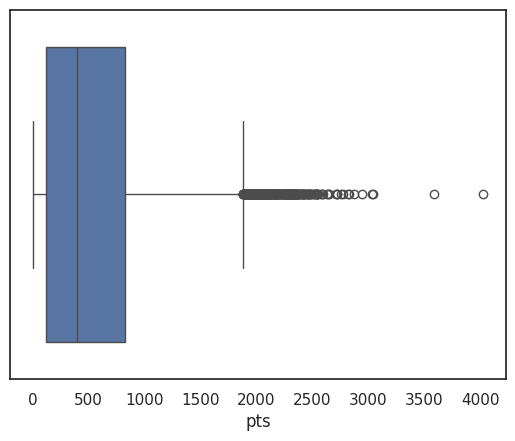

In [ ]:
print("\nPlayer Regular Season DataFrame basic info:")
print(player_regular_season_df.info())

print("\nDescriptive statistics for the Player Regular Season DataFrame:")
print(player_regular_season_df.describe())

# Average points per game across players
sns.boxplot(x='pts', data=player_regular_season_df)
plt.show()

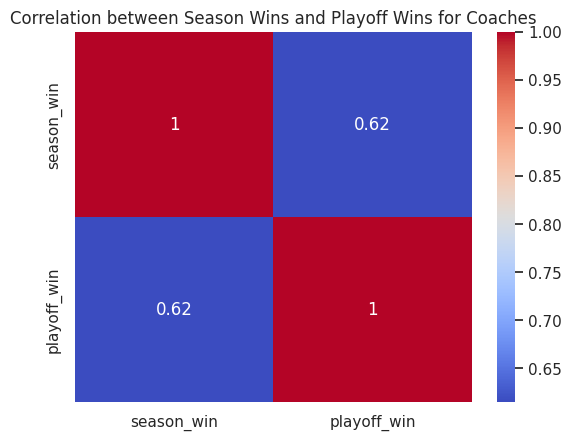

In [ ]:
# Correlation Analysis: Between season wins and playoff wins for coaches
coaches_season_df['total_wins'] = coaches_season_df['season_win'] + coaches_season_df['playoff_win']
coaches_corr = coaches_season_df[['season_win', 'playoff_win']].corr()
sns.heatmap(coaches_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Season Wins and Playoff Wins for Coaches')
plt.show()



**Clustering**


1.   Load the data
2.   Add Position column from players.txt to player_regular_season_career.txt
3. Check for thw null values in the dataset

In this project we are clustering the data based on the points earned by each player. To implement this we have done Feature scaling, Principal Component Analysis, k Means Clustering and Anamoly detection using Mean Guassian distribution



In [ ]:
warnings.filterwarnings('ignore')
df1= pd.read_csv(f'{directory_path}/player_regular_season_career.txt', delimiter=',')
df2 = pd.read_csv(f'{directory_path}/players.txt')
df2.head()
df = df1.merge(df2[['ilkid', 'position']], on='ilkid', how='left')
# Save the merged dataset
df.to_csv("merged_players_data.csv", index=False)


In [ ]:
df.columns

Index(['ilkid', 'firstname', 'lastname', 'leag', 'gp', 'minutes', 'pts',
       'oreb', 'dreb', 'reb', 'asts', 'stl', 'blk', 'turnover', 'pf', 'fga',
       'fgm', 'fta', 'ftm', 'tpa', 'tpm', 'position'],
      dtype='object')

In [ ]:
df.describe()

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,248.194467,5819.112530,2600.394520,229.751264,550.290237,1130.256717,580.475126,152.833998,92.721468,278.993615,604.080074,2222.528864,1003.826816,726.555467,542.027401,149.888534,50.743283
std,287.790690,8618.013116,4253.584589,504.242733,1122.839477,1983.447820,1088.771143,301.539763,258.103738,525.230940,795.994392,3472.946130,1638.995646,1230.622299,939.317882,475.563043,172.372352
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,143.000000,101.000000,0.000000,0.000000,30.000000,18.000000,0.000000,0.000000,0.000000,41.500000,104.000000,39.000000,31.000000,20.500000,0.000000,0.000000
50%,119.000000,1442.000000,633.000000,9.000000,40.000000,253.000000,122.000000,12.000000,4.000000,28.000000,212.000000,613.000000,243.000000,189.000000,130.000000,2.000000,0.000000
75%,390.500000,8430.500000,3283.000000,201.000000,577.500000,1416.500000,635.000000,155.000000,62.000000,306.000000,915.000000,2896.500000,1259.500000,887.000000,653.000000,38.500000,9.000000
max,1611.000000,57446.000000,38387.000000,6731.000000,11511.000000,23924.000000,15806.000000,3265.000000,3830.000000,4524.000000,4657.000000,28307.000000,15837.000000,13188.000000,9787.000000,6486.000000,2560.000000


**Principal Component Analysis (PCA)**


1.   Reduce the dataset into 2 columns for better visualization

In [ ]:
non_numeric_columns = ['ilkid', 'firstname', 'lastname', 'leag', 'position']
df_numeric = df.drop(columns=non_numeric_columns)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_numeric)
X_scaled = pd.DataFrame(X_scaled)
pca = PCA(n_components = 2)
df_cluster = pd.DataFrame(pca.fit_transform(X_scaled))
df_cluster.columns = ('PC1','PC2')
df_cluster

,PC1,PC2
0,-0.077665,-0.011589
1,2.664517,-0.358996
2,0.450373,0.191110
3,-0.045626,0.011483
4,0.946369,0.046676
...,...,...
3754,-0.285644,0.011751
3755,-0.198393,-0.006060
3756,-0.287207,0.011907
3757,-0.266398,0.006227


**Elbow Criterion**


1.   See how many clusters can be useful for the dataset


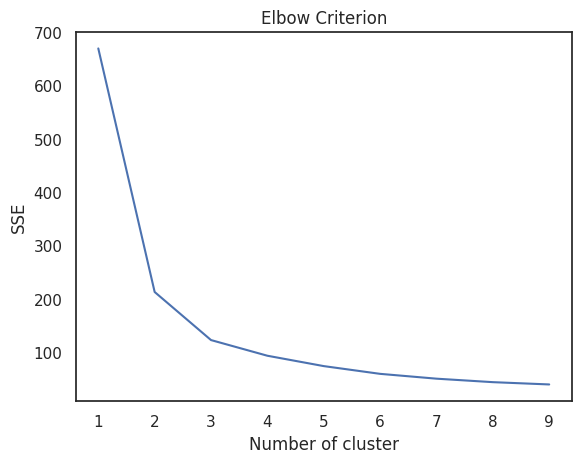

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title(f'Elbow Criterion')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()




1.   Cluster 2, 3
2.   Highest silhouette score means a good cluster



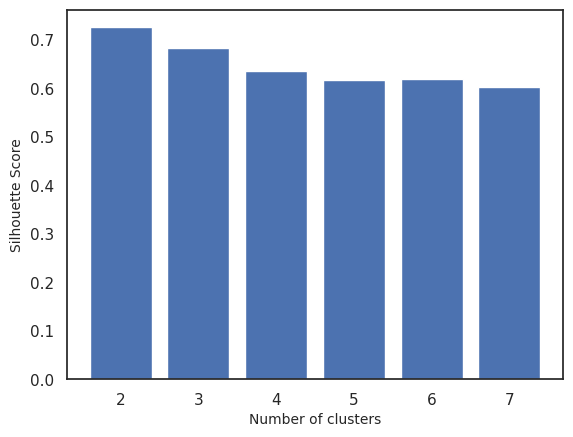

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(df_cluster, KMeans(n_clusters = n_cluster).fit_predict(df_cluster)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

**k Means Clustering**

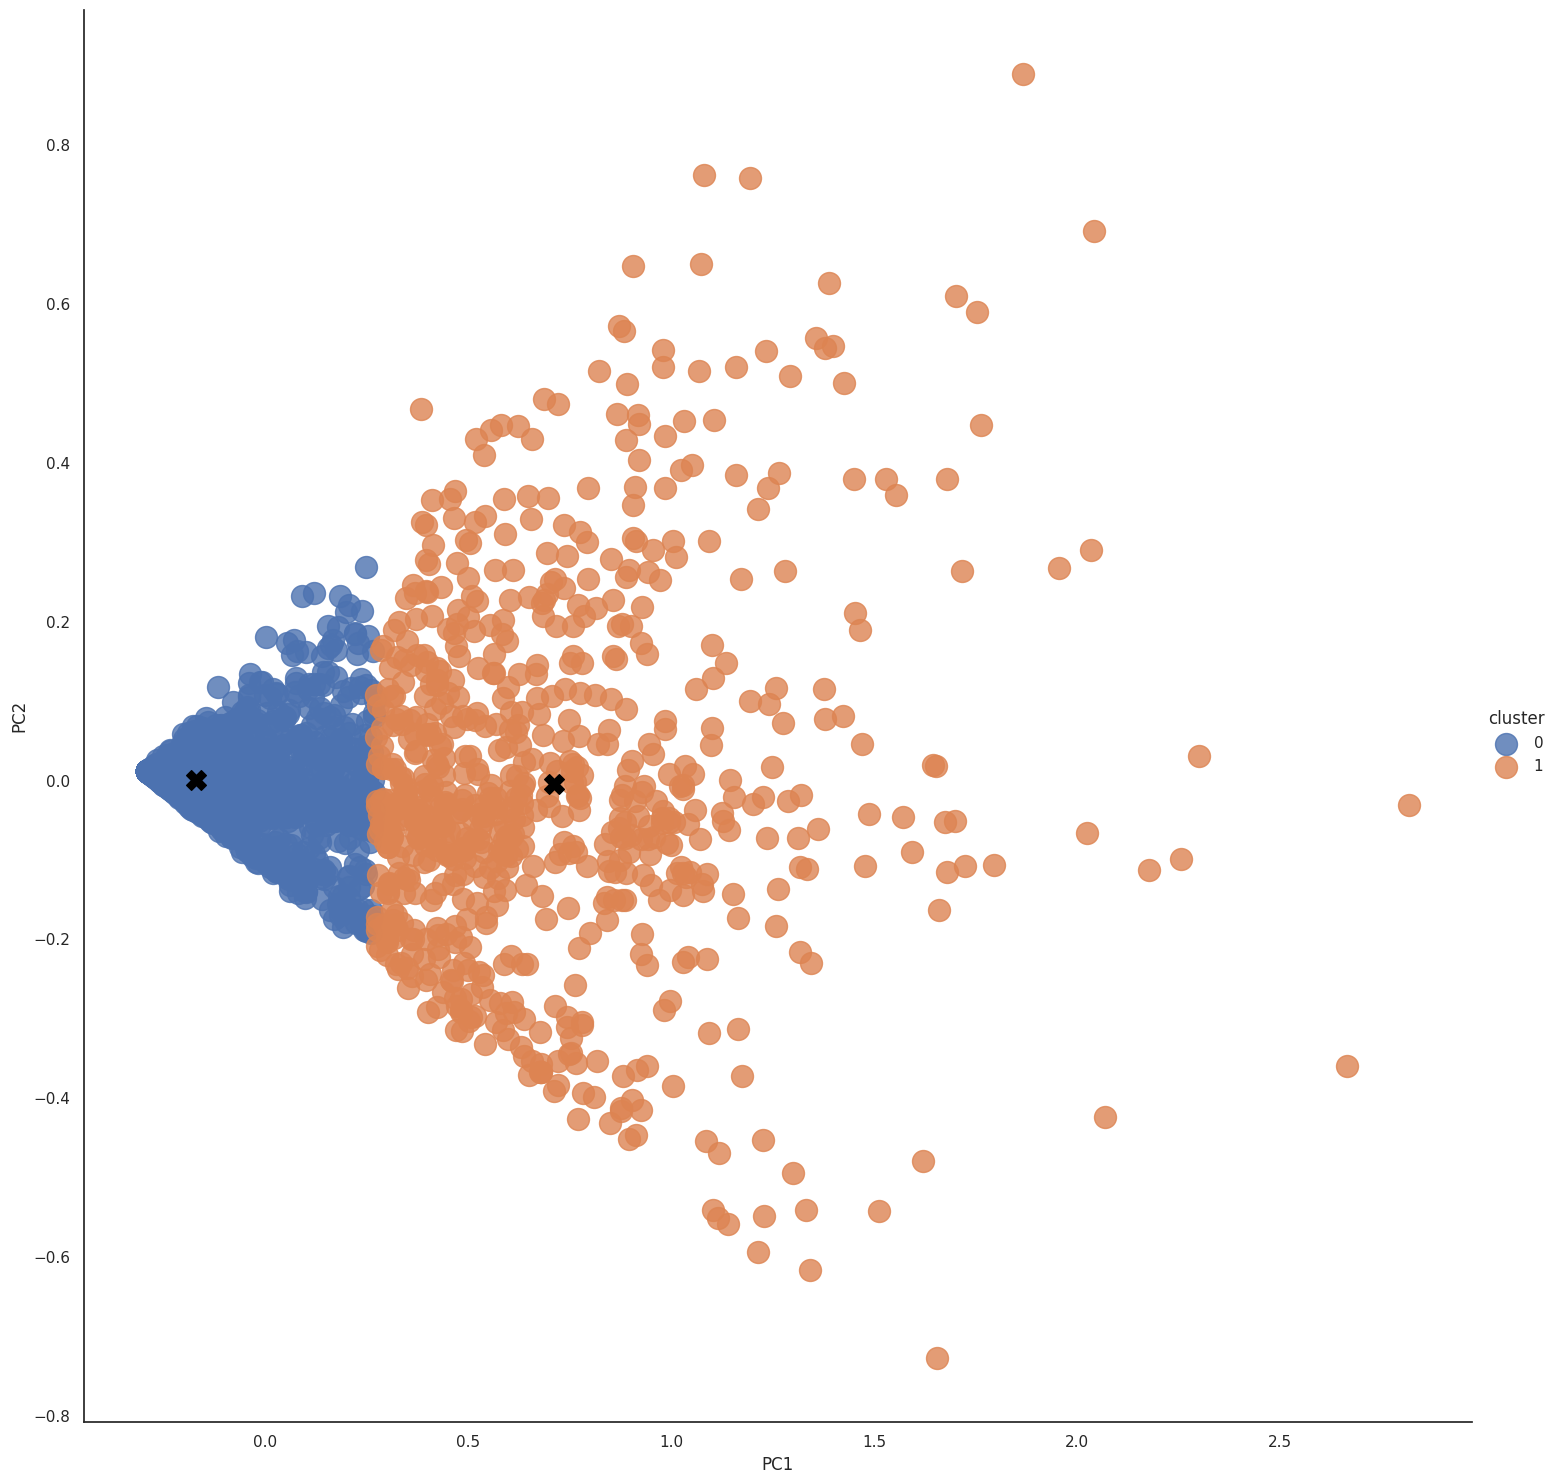

In [ ]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_cluster[['PC1', 'PC2']])

# Get cluster labels
labels = kmeans.labels_

# Get centroids
centroid = kmeans.cluster_centers_

# Assign clusters to data
df_cluster['cluster'] = labels
centroid_df = pd.DataFrame(centroid, columns = ('PC1','PC2'))

# Plot clusters
sns.set(style="white")
sns.lmplot(x="PC1", y="PC2", hue='cluster', data=df_cluster, legend=True,
           fit_reg=False, height=15, scatter_kws={"s": 250})
plt.scatter(x='PC1',y='PC2',data=centroid_df, s=200, alpha =1, c='black', marker='X', label = 'Centroid')
# Plot centroids
#plt.scatter(x=centroid[:, 0], y=centroid[:, 1], data=centroid_df, s=200, alpha=1, c='black', marker='X', label='Centroid')


**Anamoly detection**

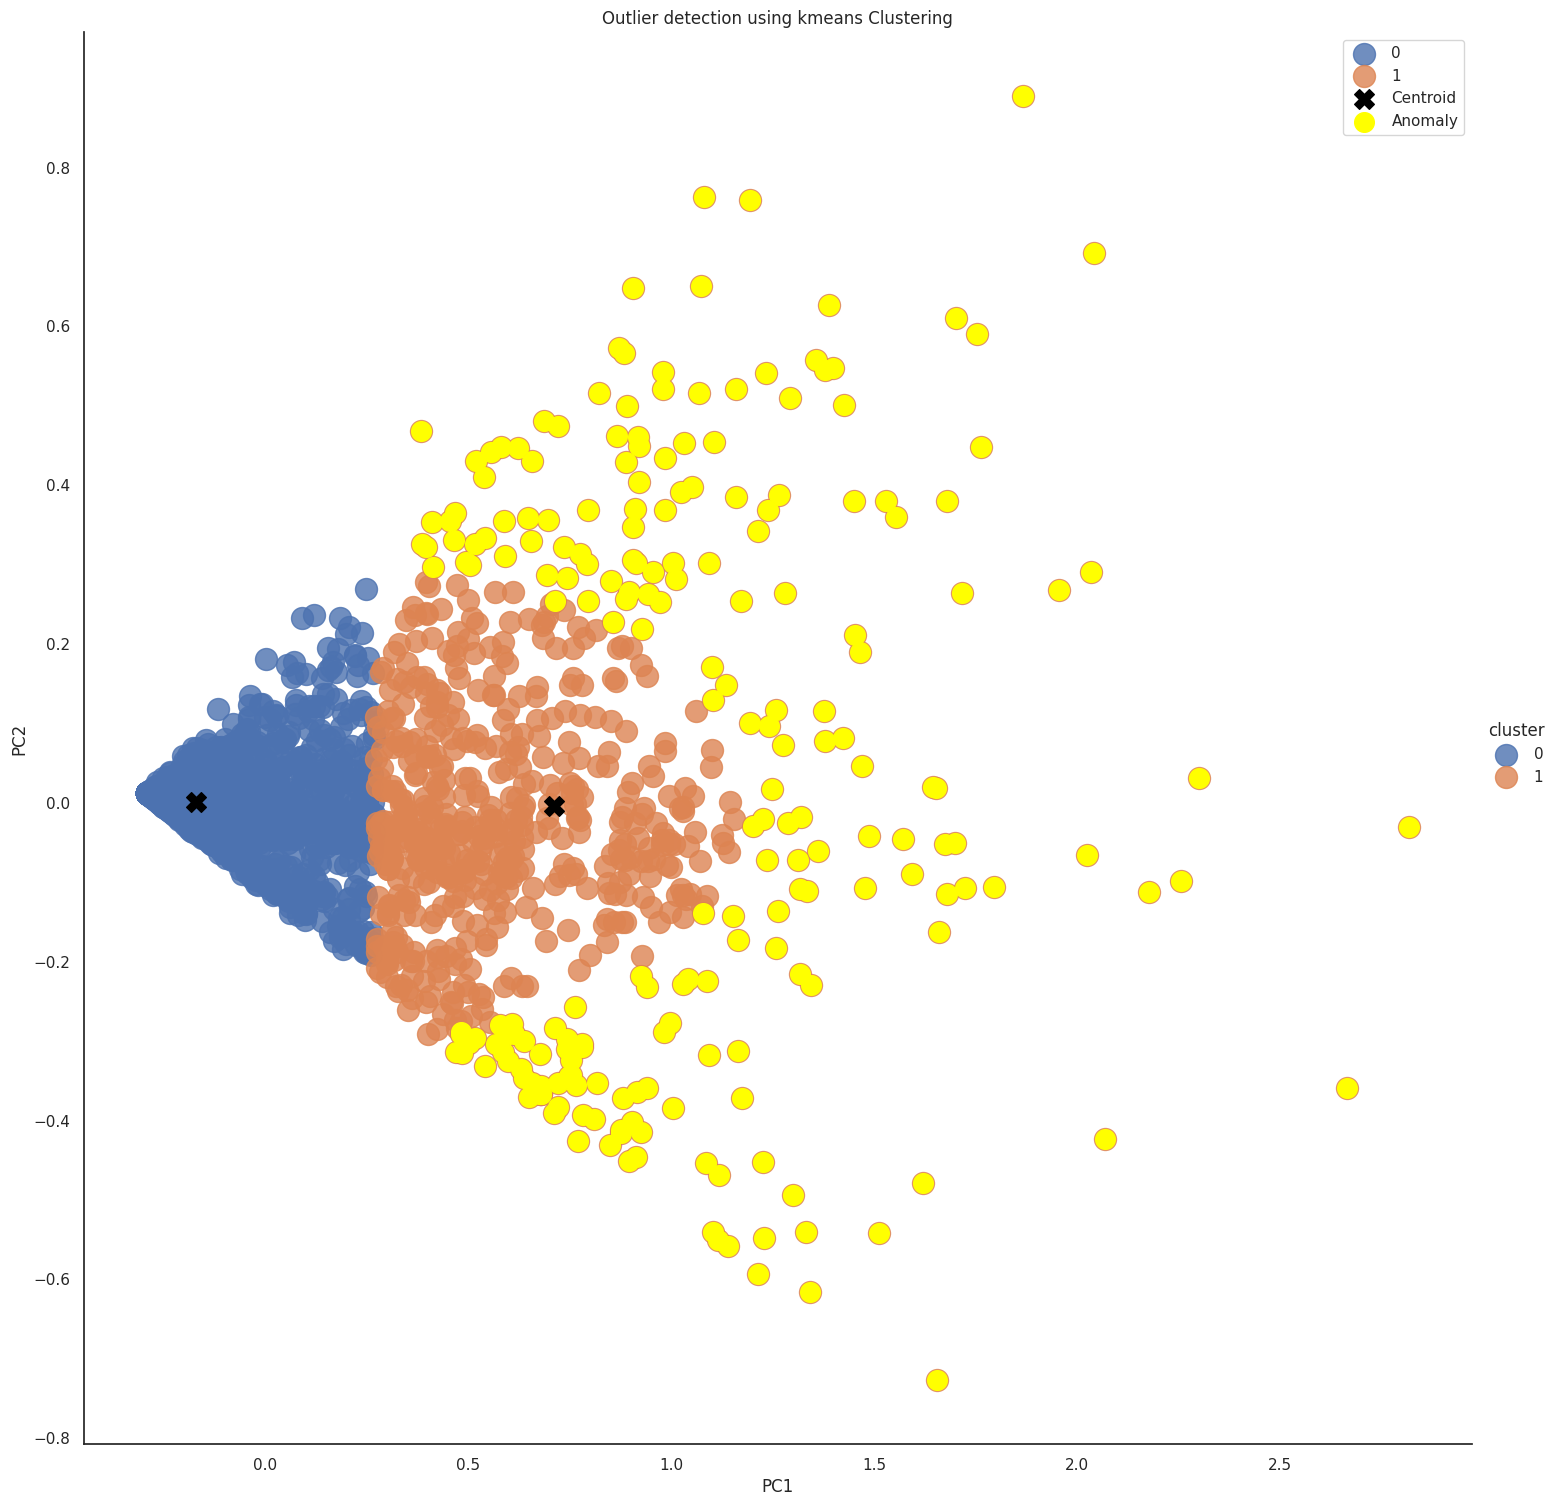

In [ ]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    dataset['Gaussian Distribution'] = p.pdf(dataset)
    return dataset

epsilon = 0.05
centroid_df = pd.DataFrame(centroid, columns = ('PC1','PC2'))

mu, sigma = estimateGaussian(df_cluster[['PC1','PC2']])
g = multivariateGaussian(df_cluster[['PC1','PC2']], mu, sigma)
anomaly_pc1 = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC1'])
anomaly_pc2 = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC2'])

sns.set(style="white")

sns.lmplot(x="PC1", y="PC2", hue='cluster', data = df_cluster, legend=True,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

plt.scatter(x='PC1',y='PC2',data=centroid_df, s=200, alpha =1, c='black', marker='X', label = 'Centroid')
plt.title(f'Outlier detection using kmeans Clustering')
plt.scatter(anomaly_pc1, anomaly_pc2, color = 'yellow', s = 200, marker='o', label = 'Anomaly')
plt.legend()
plt.show()

In [ ]:
# Find anomalies indices
anomaly_indices = g[g['Gaussian Distribution'] < epsilon].index

# Extract id's of anomalies
anomaly_names = df.iloc[anomaly_indices]['ilkid']

# Print anomalies along with their id's
print("Anomalies:")
clustering_outliers = []
for name, pc1, pc2 in zip(anomaly_names, anomaly_pc1, anomaly_pc2):
    clustering_outliers.append(f"{name}")
print(clustering_outliers)
print("Number of anomalies:", len(clustering_outliers))

Anomalies:
['ABDULKA01', 'ADAMSAL01', 'ADAMSMI01', 'AGUIRMA01', 'AINGEDA01', 'ALLENRA02', 'ANDERKE02', 'ANDERNI01', 'ANTHOGR01', 'ARIZIPA01', 'ARMSTDA01', 'BARKLCH01', 'BARNEDI01', 'BARRODA01', 'BARRYBR01', 'BARRYRI01', 'BAYLOEL01', 'BEATYZE01', 'BELLAWA01', 'BIBBYMI01', 'BILLUCH01', 'BINGDA01', 'BIRDLA01', 'BLAYLMO01', 'BOOZEBO01', 'BRAUNCA01', 'BRIDGBI01', 'BRYANKO01', 'CASSESA01', 'CHAMBTO01', 'CHAMBWI01', 'CHAPMRE01', 'CHEEKMA01', 'CHRISDO01', 'COUSYBO01', 'COWENDA01', 'CUMMITE01', 'CUNNIBI01', 'CURRYDE01', 'DANDRBO01', 'DANTLAD01', 'DAVISBA01', 'DAVISWA03', 'DEBUSDA01', 'DIVACVL01', 'DREXLCL01', 'DUMARJO01', 'EDWARJA01', 'EHLOCR01', 'ELLISDA01', 'ELLISLE01', 'EMBRYWA01', 'ENGLIAL01', 'ERVINJU01', 'EWINGPA01', 'FELIXRA01', 'FINLEMI01', 'FLOYDSL01', 'FOUSTLA01', 'FOXRI01', 'FRAZIWA01', 'GALLAHA01', 'GAMBEDA01', 'GARNEKE01', 'GERVIGE01', 'GILLKE01', 'GILMOAR01', 'GOLATO01', 'GOODRGA01', 'GRABOJO01', 'GRANTHO01', 'GREENAC01', 'GREENJO01', 'GREERHA01', 'GRIFFDA01', 'GUERIRI01', 'HAGANC

**Univariate Outlier Detection**

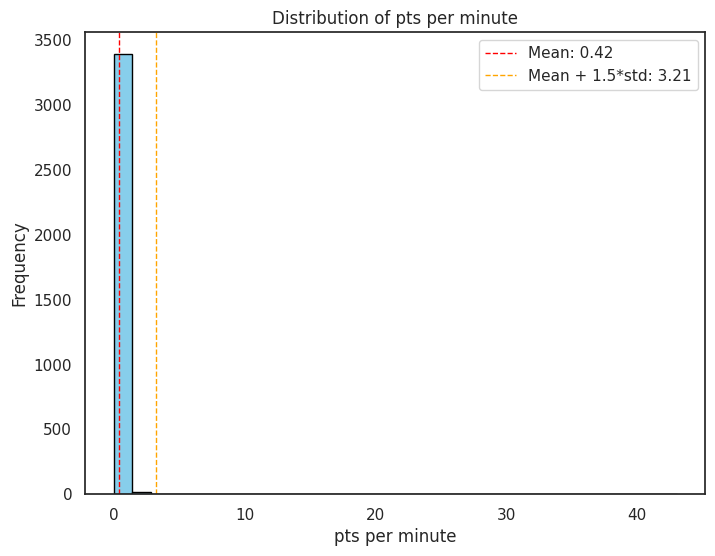

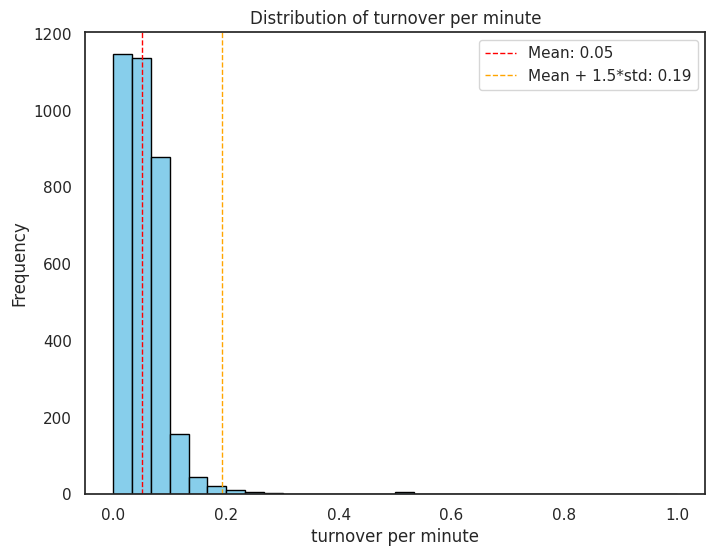

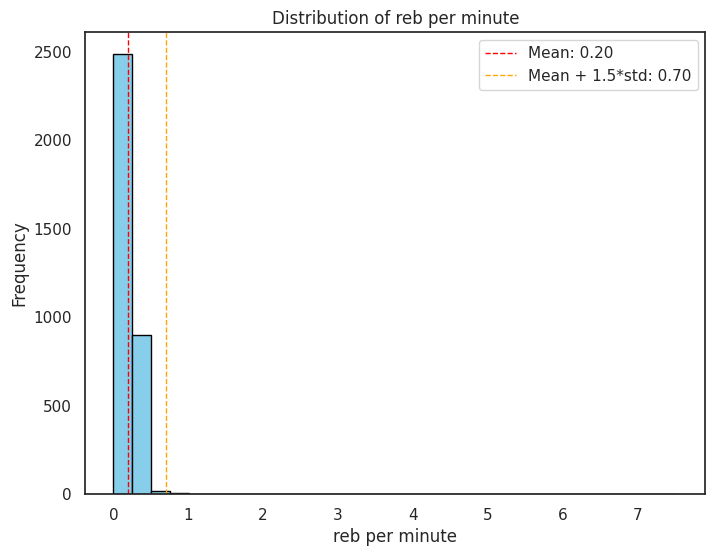

In [ ]:
#Perform univariate outlier detection on rebounds per minute, points per minute, and turnovers per minute on players_regular_season_career.

def univariateOutlierDet(data, attribute_name):
    outliers = []
    perMin = []
    for x in range(len(data[attribute_name])):
        if data['minutes'][x] != 0:
            perMin.append(float(data[attribute_name][x]) / data['minutes'][x])

    mean = sum(perMin) / len(perMin)
    newArr = np.array(perMin)
    std = np.std(newArr)

    for x in range(len(perMin)):
        point = perMin[x]
        if point > mean + (1.5 * std): #or point < mean - (3 * std):
            outliers.append(data['ilkid'][x])

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.hist(perMin, bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(f'{attribute_name} per minute')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attribute_name} per minute')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean + (3 * std), color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1.5*std: {mean + (3 * std):.2f}')
    plt.legend()
    plt.savefig(f'{attribute_name}_outliers.png')
    plt.show()

    return outliers

df = pd.read_csv('/content/drive/MyDrive/databasebasketball2.0/player_regular_season_career.txt')
outliers_pts = univariateOutlierDet(df, 'pts')
outliers_turnover = univariateOutlierDet(df, 'turnover')
outliers_reb = univariateOutlierDet(df, 'reb')

univariate_outliers = outliers_pts + outliers_turnover + outliers_reb



Distance Based Outlier Detection

In [ ]:
# Load the merged dataset
df = pd.read_csv("merged_players_data.csv")
numerical_stats = ['gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 'stl', 'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm']

# Normalize these columns
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_stats] = scaler.fit_transform(df[numerical_stats])

# Compute Euclidean distance from the mean for each player
mean_vector = df_normalized[numerical_stats].mean().values
df_normalized['distance'] = df_normalized[numerical_stats].apply(lambda x: np.linalg.norm(x - mean_vector), axis=1)

# Determine outliers: top 10% based on distance
threshold = df_normalized['distance'].quantile(0.970)
outliers = df_normalized[df_normalized['distance'] > threshold]

# Display outliers
print("Outliers based on distance:")
print(outliers[['ilkid', 'distance']])


Outliers based on distance:
          ilkid  distance
1     ABDULKA01  2.822399
11    ADAMSAL01  1.294483
17    AGUIRMA01  1.280511
142   BARKLCH01  2.079898
189   BAYLOEL01  1.502867
...         ...       ...
3592  WILKELE01  1.426989
3595  WILKIDO01  1.840616
3609  WILLIBU01  1.922448
3627  WILLIHE01  1.216836
3636  WILLIKE01  1.820884

[113 rows x 2 columns]


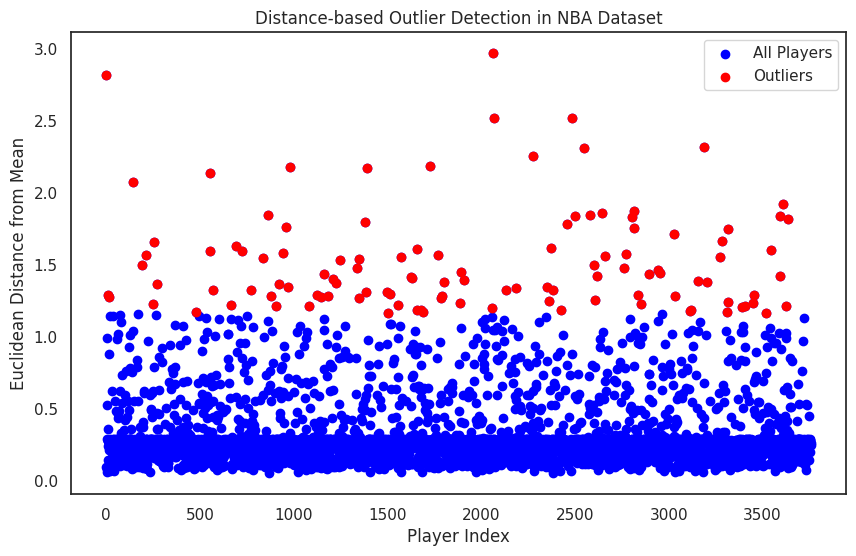

In [ ]:
# Plot all players' distances
plt.figure(figsize=(10, 6))
plt.scatter(df_normalized.index, df_normalized['distance'], label='All Players', color='blue')

# Highlight the outliers
plt.scatter(outliers.index, outliers['distance'], label='Outliers', color='red')

plt.title('Distance-based Outlier Detection in NBA Dataset')
plt.xlabel('Player Index')
plt.ylabel('Euclidean Distance from Mean')
plt.legend()
plt.show()


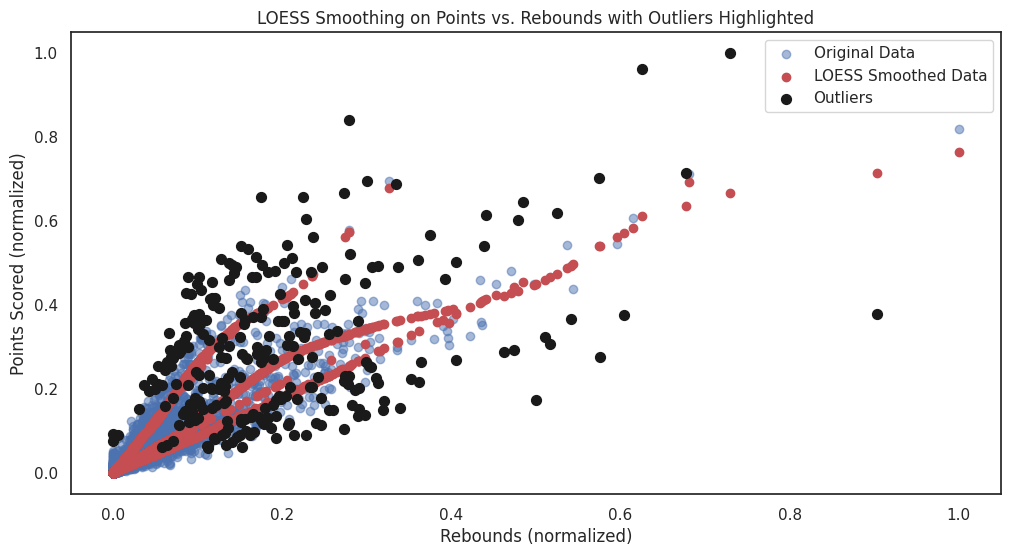

          ilkid firstname      lastname leag    gp  minutes       pts  oreb  \
0     ABDELAL01      Alaa     Abdelnaby    N   256     3200  0.038164   283   
1     ABDULKA01    Kareem  Abdul-jabbar    N  1560    57446  1.000000  2975   
2     ABDULMA01     Mahmo    Abdul-rauf    N   586    15633  0.222810   219   
3     ABDULTA01     Tariq   Abdul-wahad    N   236     4808  0.047672   275   
4     ABDURSH01   Shareef   Abdur-rahim    N   672    24862  0.347461  1498   
...         ...       ...           ...  ...   ...      ...       ...   ...   
3754  ZEVENPH01      Phil   Zevenbergen    N     8       58  0.000782     4   
3755  ZIDEKGE01    George         Zidek    N   135     1328  0.011801   108   
3756   ZOETJI01       Jim          Zoet    N     7       30  0.000052     3   
3757   ZOPFBI01      Bill          Zopf    N    53      398  0.003074     0   
3758  ZUNICMA01      Matt         Zunic    N    56        0  0.007112     0   

      dreb       reb  ...   tpa  tpm  position  pos

In [ ]:

# Load the data
df = pd.read_csv("merged_players_data.csv")

# Define numerical and categorical attributes
numerical_cols = ['pts', 'reb', 'asts', 'stl', 'blk']
categorical_cols = ['position', 'leag']

# Normalize numerical data
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# One-hot encode categorical data
encoder = OneHotEncoder(drop='first')
encoded_cats = encoder.fit_transform(df[categorical_cols]).toarray()
cat_feature_labels = encoder.get_feature_names_out(categorical_cols)
encoded_cats_df = pd.DataFrame(encoded_cats, columns=cat_feature_labels)

# Concatenate encoded categorical data with the original DataFrame
df = pd.concat([df, encoded_cats_df], axis=1)

# Function to apply LOESS smoothing considering both numerical and categorical attributes
def loess_with_cats(df, y_col, x_cols, cat_cols, frac=0.3):
    y = df[y_col].values
    X = df[x_cols].values
    cats = df[cat_cols].values
    n = len(df)
    loess_results = np.zeros(n)

    for i in range(n):
        distances = cdist(X, [X[i]], metric='euclidean') + cdist(cats, [cats[i]], metric='hamming')
        indices = np.argsort(distances.ravel())[:max(3, int(frac * n))]
        weights = (1 - (np.sqrt(distances[indices]) / np.sqrt(distances[indices].max()))**3)**3

        b = np.polyfit(X[indices].ravel(), y[indices].ravel(), 1, w=weights.ravel())
        loess_results[i] = np.polyval(b, X[i])

    return loess_results

# Apply LOESS smoothing to 'pts' using 'reb' as the predictor and including categorical data
df['smoothed_pts'] = loess_with_cats(df, 'pts', ['reb'], cat_feature_labels, frac=0.3)

# Detect outliers based on the residual errors from LOESS smoothing
df['residuals'] = np.abs(df['smoothed_pts'] - df['pts'])
threshold = 2 * df['residuals'].std()  # Define threshold for outlier detection
df['outlier'] = df['residuals'] > threshold

# Function to generate natural language explanations for outliers


# Visualize the results and highlight outliers
plt.figure(figsize=(12, 6))
plt.scatter(df['reb'], df['pts'], alpha=0.5, label='Original Data')
plt.scatter(df['reb'], df['smoothed_pts'], color='r', label='LOESS Smoothed Data')
outlier_points = df[df['outlier']]
plt.scatter(outlier_points['reb'], outlier_points['pts'], color='k', s=50, label='Outliers')
plt.title('LOESS Smoothing on Points vs. Rebounds with Outliers Highlighted')
plt.xlabel('Rebounds (normalized)')
plt.ylabel('Points Scored (normalized)')
plt.legend()
plt.show()
print(df)

In [ ]:
def explain_outlier(row):
    if row['outlier']:
        return f"Player with ID {row['ilkid']} is considered an outlier due to unusual points scored ({row['pts']*100:.1f} normalized points) relative to others with similar playing time and position."
    else:
        return ""
# Apply explanations to outliers
df['explanation'] = df.apply(explain_outlier, axis=1)
print(df['explanation'])

0                                                        
1       Player with ID ABDULKA01 is considered an outl...
2       Player with ID ABDULMA01 is considered an outl...
3                                                        
4                                                        
                              ...                        
3754                                                     
3755                                                     
3756                                                     
3757                                                     
3758                                                     
Name: explanation, Length: 3759, dtype: object


In [ ]:
# Open a text file in write mode
with open('outlier_explanations.txt', 'w') as file:
    # Iterate over the DataFrame's 'explanation' column
    for explanation in df[df['outlier']]['explanation']:
        file.write(explanation + '\n')  # Write each explanation to a new line

In [ ]:
# Load the main dataset


allstar_df = pd.read_csv("/content/drive/MyDrive/databasebasketball2.0/player_allstar.txt", delimiter=',')
print(allstar_df.columns)
allstar_ids = allstar_df['ilkid'].unique()



Index(['ilkid', 'year', 'firstname', 'lastname', 'conference', 'leag', 'gp',
       'minutes', 'pts', 'dreb', 'oreb', 'reb', 'asts', 'stl', 'blk',
       'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm'],
      dtype='object')


0       0
1       0
2       0
3       0
4       0
       ..
3754    0
3755    0
3756    0
3757    0
3758    0
Name: is_allstar, Length: 3759, dtype: int64
['ABDULKA01' 'ABDULMA01' 'ADAMSAL01' 'AGUIRMA01' 'ANDERCA01' 'ANDERNI01'
 'ANDERSH01' 'ARCHINA01' 'ARIZIPA01' 'ATTLEAL01' 'AUGMOST01' 'BARKLCH01'
 'BARNEDI01' 'BARRYRI01' 'BARRYRI01' 'BAYLOEL01' 'BEARDBU01' 'BINGDA01'
 'BIRDLA01' 'BIRDSOT01' 'BLACKRO01' 'BLOUNCO01' 'BOCKHAR01' 'BOERWTO01'
 'BOGUEMU01' 'BRADLBI01' 'BREWEJI01' 'BRIDGBI01' 'BRIDGJU01' 'BROWNFR01'
 'BROWNPJ01' 'BROWNRO01' 'CAGEMI01' 'CALVIMA01' 'CAMPBTO01' 'CARRKE01'
 'CARROJO01' 'CARTEGE01' 'CARTWBI01' 'CATCHHA01' 'CHAMBTO01' 'CHANEDO01'
 'CHAPMRE01' 'CHEANCA01' 'CHRISDO01' 'CLEAMJI01' 'COLEMJA01' 'CONNELE01'
 'COOPEMI01' 'CUMMITE01' 'CURETEA01' 'DAMPILO01' 'DANDRBO01' 'DANTLAD01'
 'DAUGHBR01' 'DAVISAN01' 'DAVISDA01' 'DAVISJO01' 'DAVISTE01' 'DAVISWA03'
 'DONALJA01' 'DREWJO01' 'DREWLA01' 'DUDLECH02' 'DUKESWA01' 'DUMARJO01'
 'DUNNTR01' 'EATONMA01' 'EDWARJA01' 'EHLOCR01' '

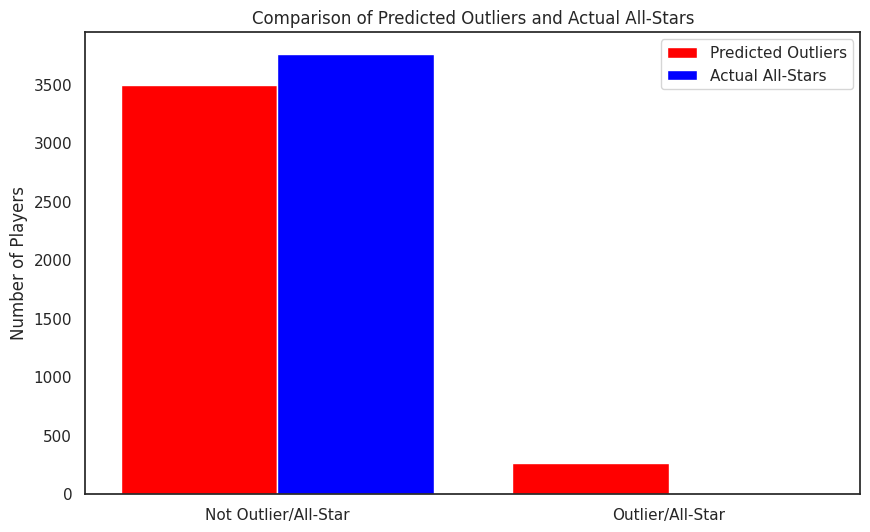

In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


# Mark all-stars in your main dataframe
df['is_allstar'] = df['ilkid'].isin(allstar_ids).astype(int)
print(df['is_allstar'] )

# Assuming 'outlier' column is 1 for outliers and 0 otherwise (already calculated in your script)
predicted_outliers = df[df['outlier'] == True]['ilkid'].values
print(predicted_outliers)

# Metrics calculation
y_true = df['is_allstar']  # True labels
print(y_true)
y_pred = df['outlier']  # Predicted labels

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally, check which outliers are all-stars
outliers_as_allstars = df[(df['outlier'] == 1) & (df['is_allstar'] == 1)]
print(outliers_as_allstars[['ilkid', 'pts', 'reb', 'asts', 'blk', 'stl', 'is_allstar']])

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist([y_pred, y_true], bins=2, color=['red', 'blue'], label=['Predicted Outliers', 'Actual All-Stars'])
plt.xticks([0.25, 0.75], ["Not Outlier/All-Star", "Outlier/All-Star"])
plt.ylabel('Number of Players')
plt.legend()
plt.title('Comparison of Predicted Outliers and Actual All-Stars')
plt.show()


In [ ]:

allstar_df['ilkid'] = allstar_df['ilkid'].str.strip().str.upper()
df['ilkid'] = df['ilkid'].str.strip().str.upper()

# Filter the main dataframe for outliers
outliers_df = df[df['outlier'] == True]

# Merge the all-star data with the filtered outliers on 'ilkid'
common_outliers = pd.merge(outliers_df, allstar_df, on='ilkid', how='inner')

print(common_outliers)

         ilkid firstname_x    lastname_x leag_x  gp_x  minutes_x     pts_x  \
0    ABDULKA01      Kareem  Abdul-jabbar      N  1560      57446  1.000000   
1    ABDULKA01      Kareem  Abdul-jabbar      N  1560      57446  1.000000   
2    ABDULKA01      Kareem  Abdul-jabbar      N  1560      57446  1.000000   
3    ABDULKA01      Kareem  Abdul-jabbar      N  1560      57446  1.000000   
4    ABDULKA01      Kareem  Abdul-jabbar      N  1560      57446  1.000000   
..         ...         ...           ...    ...   ...        ...       ...   
754  WORTHJA01       James        Worthy      N   926      30001  0.425144   
755  WORTHJA01       James        Worthy      N   926      30001  0.425144   
756  WORTHJA01       James        Worthy      N   926      30001  0.425144   
757  WORTHJA01       James        Worthy      N   926      30001  0.425144   
758  ZASLOMA01         Max     Zaslofsky      N   540       6760  0.208143   

     oreb_x  dreb_x     reb_x  ...  stl_y  blk_y  turnover_y  p

In [ ]:
num_correct_predictions = common_outliers.shape[0]
print("Number of correctly predicted outliers (All-Stars also flagged as outliers):", num_correct_predictions)

# Optionally, save to a CSV file
common_outliers.to_csv("common_outliers_allstars.csv", index=False)

Number of correctly predicted outliers (All-Stars also flagged as outliers): 759


In [ ]:
import pandas as pd

# Assuming all previous data loading and cleaning has been done
# Load and clean your dataframes (df and allstar_df) as previously described

# Define actual positives (all-stars) and predictions
actual_positives = df['ilkid'].isin(allstar_df['ilkid'])
predicted_positives = df['outlier'] == 1
predicted_negatives = ~predicted_positives

# True Positives: predicted as outliers and are actual all-stars
TP = df[predicted_positives & actual_positives].shape[0]

# False Positives: predicted as outliers but are not actual all-stars
FP = df[predicted_positives & ~actual_positives].shape[0]

# True Negatives: not predicted as outliers and are not all-stars
TN = df[predicted_negatives & ~actual_positives].shape[0]

# False Negatives: not predicted as outliers but are actual all-stars
FN = df[predicted_negatives & actual_positives].shape[0]

# Calculate Accuracy, Precision, and Recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Optionally, calculate F1 Score if needed
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.8914604948124502
Precision: 0.6142322097378277
Recall: 0.34968017057569295
F1 Score: 0.44565217391304346


In [ ]:

#Evaluation function that takes a unique set of player ilkid as input and
#compares them against the outstanding players chosen as allstars.
def evaluate(outlier_points):
  outlier_points = np.array(outlier_points)

  #Number of true positives.
  tp = 0
  #Number of true negatives.
  tn = 0
  #Number of false postives.
  fp = 0
  #Number of false negatives.
  fn = 0
  #Compare data against allstar players data.
  allstar_players = player_allstar_df["ilkid"].unique()
  for x in range(len(outlier_points)):
    outlier_points[x] = outlier_points[x].upper().strip()
  if "CAMBYMA01" in outlier_points:
    print("Camby")
  if "KIDDJA01" in outlier_points:
    print("Kidd")
  if "STOUDAM01" in outlier_points:
    print("Am")
  if "JAMESLE01" in outlier_points:
    print("James")
  if "EVANSRE01" in outlier_points:
    print("Reggie Evans")

  for x in range(len(allstar_players)):
    allstar_players[x] = allstar_players[x].upper().strip()
  #Draw on the dataset of all players.
  reg_season_players = player_regular_season_career_df["ilkid"].unique()
  #Caluclate the number of true postives, false postives, true negatives, and false negatives.
  for outlier in outlier_points:
    if outlier in allstar_players:
      tp = tp + 1
    else:
      fp = fp + 1
  fn = len(allstar_players) - tp
  tn = len(reg_season_players) - fp
  #Calculate the accuracy.
  accuracy = float(tp+tn)/(tp+fp+tn+fn)
  #Calculate the percision.
  precision = float(tp)/(tp + fp) if tp + fp > 0 else 0
  #Calculate the recall.
  recall = float(tp)/(tp+fn) if tp + fn > 0 else 0
  #Calculate the f1 score.
  f1 = float(2 * precision * recall)/(precision + recall) if precision + recall > 0 else 0
  #Print the results.
  print("Accuracy:" + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("F1 Score: " + str(f1) + '\n')
  print(str(tp) + " " + str(fp) + " " + str(tn) + str(fn))
  metrics = {
       "accuracy": (tp + tn) / (tp + fp + tn + fn),
       "precision": tp / (tp + fp) if (tp + fp) > 0 else 0,
       "recall": tp / (tp + fn) if (tp + fn) > 0 else 0,
       "f1_score": (2 * (tp / (tp + fp))) if (tp + fp > 0 and tp + fn > 0) else 0
   }


  return metrics


#LOESS smoothing
loess_outliers=evaluate(outlier_points["ilkid"].unique())
print(outlier_points["ilkid"].unique())
#Distance based outlier detection
distance_outliers=evaluate(outliers['ilkid'].unique())
#Univariate based outlier detection
univariate_outliers=evaluate(list(set(univariate_outliers)))
#Clustering based outlier detection
clustering_outliers=evaluate(list(set(clustering_outliers)))


Kidd
Accuracy:0.9093186372745491
Precision: 0.6098484848484849
Recall: 0.38333333333333336
F1 Score: 0.4707602339181287

161 103 3469259
['ABDULKA01' 'ABDULMA01' 'ADAMSAL01' 'AGUIRMA01' 'ANDERCA01' 'ANDERNI01'
 'ANDERSH01' 'ARCHINA01' 'ARIZIPA01' 'ATTLEAL01' 'AUGMOST01' 'BARKLCH01'
 'BARNEDI01' 'BARRYRI01' 'BAYLOEL01' 'BEARDBU01' 'BINGDA01' 'BIRDLA01'
 'BIRDSOT01' 'BLACKRO01' 'BLOUNCO01' 'BOCKHAR01' 'BOERWTO01' 'BOGUEMU01'
 'BRADLBI01' 'BREWEJI01' 'BRIDGBI01' 'BRIDGJU01' 'BROWNFR01' 'BROWNPJ01'
 'BROWNRO01' 'CAGEMI01' 'CALVIMA01' 'CAMPBTO01' 'CARRKE01' 'CARROJO01'
 'CARTEGE01' 'CARTWBI01' 'CATCHHA01' 'CHAMBTO01' 'CHANEDO01' 'CHAPMRE01'
 'CHEANCA01' 'CHRISDO01' 'CLEAMJI01' 'COLEMJA01' 'CONNELE01' 'COOPEMI01'
 'CUMMITE01' 'CURETEA01' 'DAMPILO01' 'DANDRBO01' 'DANTLAD01' 'DAUGHBR01'
 'DAVISAN01' 'DAVISDA01' 'DAVISJO01' 'DAVISTE01' 'DAVISWA03' 'DONALJA01'
 'DREWJO01' 'DREWLA01' 'DUDLECH02' 'DUKESWA01' 'DUMARJO01' 'DUNNTR01'
 'EATONMA01' 'EDWARJA01' 'EHLOCR01' 'ELLIOSE01' 'ELLISDA01' 'ELLISL

In [ ]:
def confusion_mat(outlier_points):
  outlier_points = np.array(outlier_points)
  #Number of true positives.
  tp = 0
  #Number of true negatives.
  tn = 0
  #Number of false postives.
  fp = 0
  #Number of false negatives.
  fn = 0
  #Compare data against allstar players data.
  allstar_players = player_allstar_df["ilkid"].unique()
  for x in range(len(outlier_points)):
    outlier_points[x] = outlier_points[x].upper().strip()
  for x in range(len(allstar_players)):
    allstar_players[x] = allstar_players[x].upper().strip()
  #Draw on the dataset of all players.
  reg_season_players = player_regular_season_career_df["ilkid"].unique()
  #Caluclate the number of true postives, false postives, true negatives, and false negatives.
  for outlier in outlier_points:
    if outlier in allstar_players:
      tp = tp + 1
    else:
      fp = fp + 1
  fn = len(allstar_players) - tp
  tn = len(reg_season_players) - fp
  return tp,tn,fp,fn

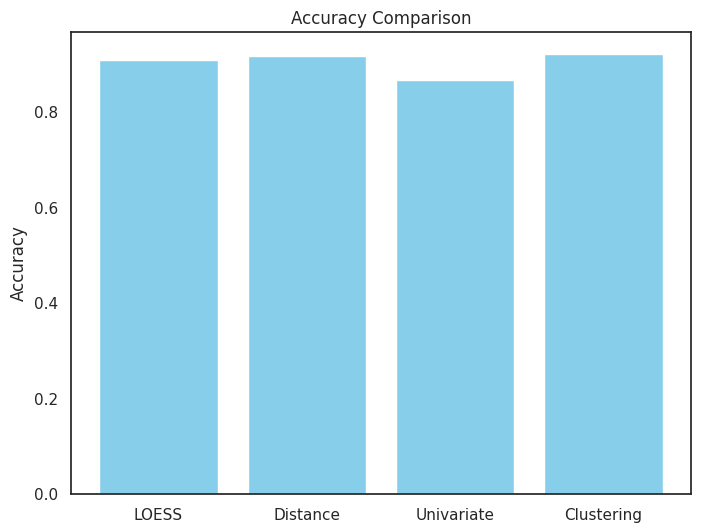

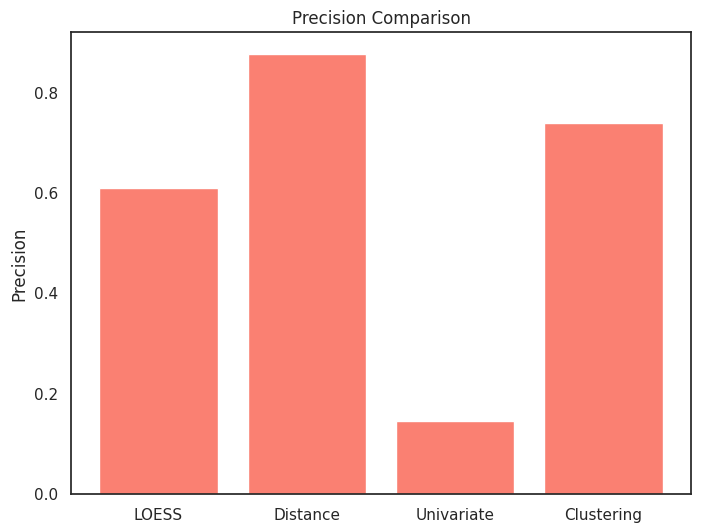

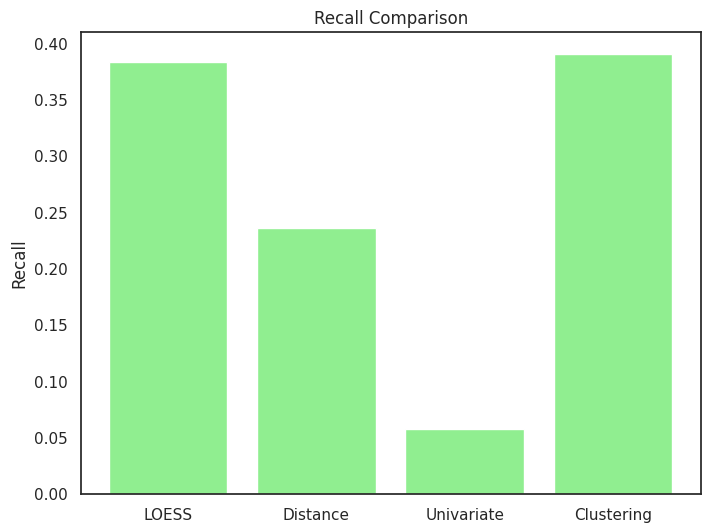

In [ ]:
import matplotlib.pyplot as plt

# Define outlier detection methods and their corresponding metrics
methods = ['LOESS', 'Distance', 'Univariate', 'Clustering']
accuracies = [loess_outliers['accuracy'], distance_outliers['accuracy'], univariate_outliers['accuracy'], clustering_outliers['accuracy']]
precisions = [loess_outliers['precision'], distance_outliers['precision'], univariate_outliers['precision'], clustering_outliers['precision']]
recalls = [loess_outliers['recall'], distance_outliers['recall'], univariate_outliers['recall'], clustering_outliers['recall']]

# Plotting accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
# Plotting precision comparison
plt.figure(figsize=(8, 6))
plt.bar(methods, precisions, color='salmon')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.show()
# Plotting recall comparison
plt.figure(figsize=(8, 6))
plt.bar(methods, recalls, color='lightgreen')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.show()


Confusion Matrix for LOESS Smoothing:


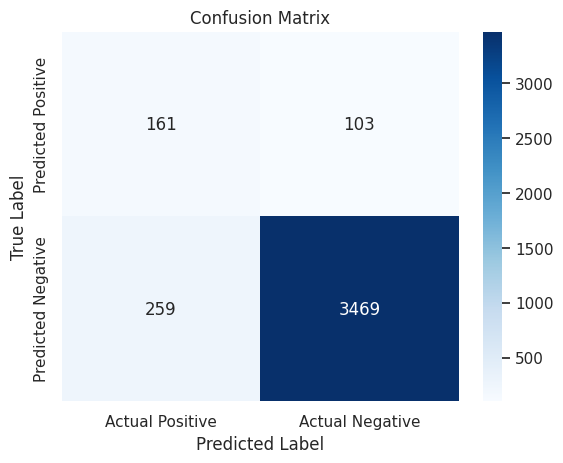

Confusion Matrix for Distance Based Outlier Detection:


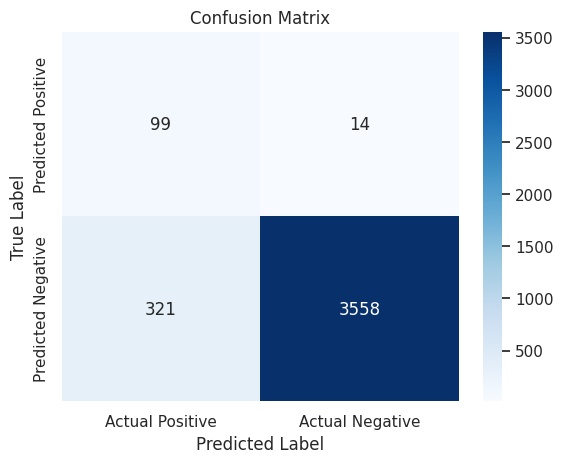

Confusion Matrix for Univariate Based Outlier Detection:


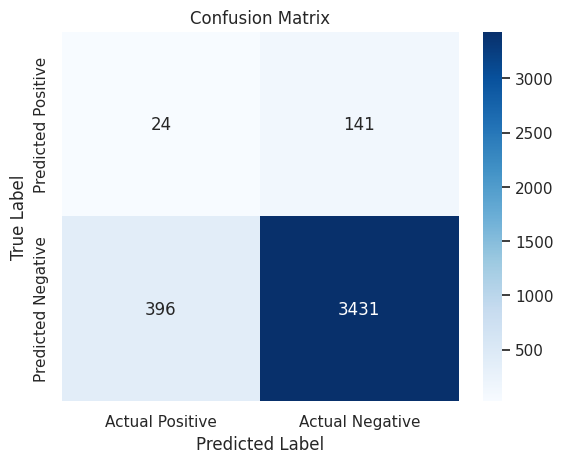

Confusion Matrix for Clustering Based Outlier Detection:


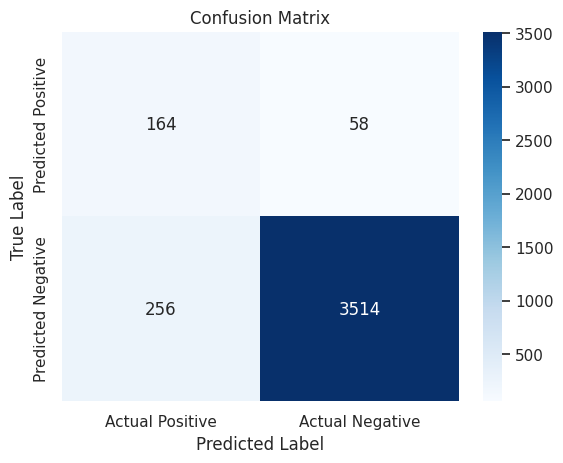

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(tp, tn, fp, fn):
    confusion_matrix = np.array([[tp, fp], [fn, tn]])

    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g',
                xticklabels=['Actual Positive', 'Actual Negative'],
                yticklabels=['Predicted Positive', 'Predicted Negative'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# LOESS smoothing
tp_loess,tn_loess,fp_loess,fn_loess= confusion_mat(outlier_points["ilkid"].unique())

# Distance based outlier detection
tp_distance,tn_distance,fp_distance,fn_distance  = confusion_mat(outliers['ilkid'].unique())

# Univariate based outlier detection
tp_univariate,tn_univariate,fp_univariate,fn_univariate = 24, 3431, 141, 396

# Clustering based outlier detection
tp_clustering,tn_clustering,fp_clustering,fn_clustering = 164, 3514, 58, 256


# Plotting confusion matrices for each method
print("Confusion Matrix for LOESS Smoothing:")
plot_confusion_matrix(tp_loess, tn_loess, fp_loess, fn_loess)

print("Confusion Matrix for Distance Based Outlier Detection:")
plot_confusion_matrix(tp_distance, tn_distance, fp_distance, fn_distance)

print("Confusion Matrix for Univariate Based Outlier Detection:")
plot_confusion_matrix(tp_univariate, tn_univariate, fp_univariate, fn_univariate)

print("Confusion Matrix for Clustering Based Outlier Detection:")
plot_confusion_matrix(tp_clustering, tn_clustering, fp_clustering, fn_clustering)
